In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from pathlib import Path
import warnings

warnings.filterwarnings('ignore') #supress warnings
sns.set(style='darkgrid') # set theme for plotting
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# WE WILL DO THE FOLLOWING THINGS IN ORDER
- Brief overview of data and some good ml practices
- EDA
- Feature engineering
- spliting into train, validation dataset
- Missing Values
- Preprocessing
- Feature Selection
- establish a baseline model
- find the best models
- use the best models to make prediction

****EDA, Feature Engineering and Missing Values are not done sequentially as you would sometimes do EDA and feature engineering in  all the parts. We will data cleaning as we in each step when necessary Normally for small datasets such as these it is good choice do the intial outlayer detection and data cleaning with spreadsheets but here we will just do it everything with python****

# Data Overview and some good practices

- see some general information about the training dataset
- check for duplicates
- resample the dataset

In [38]:
# loading dataset

path = Path('./files/')

train = pd.read_csv(path / 'train.csv')
test = pd.read_csv(path / 'test.csv')

train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05000,Low,Working,Sales staff,Semi-Urban,72809.58000,...,809.44000,0,NaN,746,1933.05000,4,Rural,1,119933.46000,54607.18000
1,C-33999,America Calderone,M,32,4952.91000,Low,Working,NaN,Semi-Urban,46837.47000,...,780.40000,0,Unpossessed,608,4952.91000,2,Rural,1,54791.00000,37469.98000
2,C-3770,Rosetta Verne,F,65,988.19000,High,Pensioner,NaN,Semi-Urban,45593.04000,...,833.15000,0,Unpossessed,546,988.19000,2,Urban,0,72440.58000,36474.43000
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92000,...,832.70000,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51000,56040.54000
4,C-23459,Afton Venema,F,31,2614.77000,Low,Working,High skill tech staff,Semi-Urban,113858.89000,...,745.55000,1,Active,715,2614.77000,4,Semi-Urban,1,208567.91000,74008.28000


In [39]:
# cheking the datasets shape
rows = train.shape[0]
cols = train.shape[1]

print(f"The training dataframe has {rows} rows and {cols} cols")

The training dataframe has 30000 rows and 24 cols


In [40]:
# data types
print("TRAINING SET:\n")
display(train.dtypes)

print("\nTEST SET: \n")
display(test.dtypes)

TRAINING SET:



Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object


TEST SET: 



Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

Some data types in train and test set does not match lets convert them and Property types seems like a categorical features but is int we will convert to object type

In [41]:
test['Co-Applicant'].unique()

array(['1', '0', '?'], dtype=object)

In [42]:
# Property Price and Co-Applicant has ? we need to replace wtih null first before converting them to int or float
test[['Property Price', 'Co-Applicant']] = test[['Property Price', 'Co-Applicant']].replace({"?": np.nan})
test[['Property Price', 'Co-Applicant']] = test[['Property Price', 'Co-Applicant']].astype('float')

In [43]:
train["Property Type"] = train["Property Type"].astype('object')
test["Property Type"] = test['Property Type'].astype('object')

In [44]:
# missing values
print('TRAINING SET MISSING VALUES: \n')
display(train.isnull().sum().sort_values(ascending=False))

print('\nTEST SET MISSING VALUES: \n')
display(test.isnull().sum().sort_values(ascending=False))

TRAINING SET MISSING VALUES: 



Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
Property Price                    0
Co-Applicant                      0
Property Type                     0
Property ID                       0
Customer ID                       0
No. of Defaults                   0
Name                              0
Expense Type 1                    0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Age                               0
Expense Type 2                    0
dtype: int64


TEST SET MISSING VALUES: 



Type of Employment             4689
Dependents                     1142
Has Active Credit Card         1076
Property Age                    892
Income Stability                813
Income (USD)                    750
Credit Score                    743
Property Price                  168
Property Location               160
Current Loan Expenses (USD)      83
Co-Applicant                     77
Gender                           31
No. of Defaults                   0
Property Type                     0
Property ID                       0
Customer ID                       0
Expense Type 2                    0
Name                              0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Age                               0
Expense Type 1                    0
dtype: int64

In [45]:
total_cells = rows * cols
train_missing = train.isnull().sum().sum()
test_missing = test.isnull().sum().sum()

print(f"Missing values percentage in train set {round((train_missing / total_cells) * 100, 3)}%")
print(f"Missing values percentage in train set {round((test_missing / total_cells) * 100, 3)}%")

Missing values percentage in train set 3.481%
Missing values percentage in train set 1.476%


Not all columns has null values and percentage of null values are also low in train and test set

****checking for duplicates****

In [46]:
train_duplicates = train.duplicated(subset=['Customer ID'], keep='first')
test_duplicates = test.duplicated(subset=['Customer ID'], keep='first')

print(f'There are {train_duplicates.sum()} is the training dataset')
print(f'There are {test_duplicates.sum()} is the test dataset')

There are 0 is the training dataset
There are 0 is the test dataset


****checking cardiniality****
<br>Generally too many cardiniality(unique values) in a feature is not good for making predictions as too many unique category means less examples for each unique value. So models can not learn from each unique category. Moreover if we use a feature with high cardinality and one hot encode it there would be too many features created

In [47]:
train.nunique().sort_values(ascending=False)

Customer ID                    30000
Name                           30000
Loan Amount Request (USD)      29982
Property Price                 29632
Income (USD)                   24429
Property Age                   24179
Current Loan Expenses (USD)    24041
Loan Sanction Amount (USD)     21450
Credit Score                   17586
Property ID                      999
Age                               48
Type of Employment                18
Dependents                        10
Profession                         8
Property Type                      4
Location                           3
Has Active Credit Card             3
Property Location                  3
Co-Applicant                       3
Expense Type 1                     2
Income Stability                   2
No. of Defaults                    2
Gender                             2
Expense Type 2                     2
dtype: int64

Many feature has high cardinality which was to be accepted as the features with high cardianility are mostly contain unique and continous values

We can say for sure that Name and Customer ID would not be good as a fetaure directly but we can see if new features from feature engineering will be of any use later and target feature Loan Santioned Amount (USD) is also 340 null values since we have a lot observation we will just delete them

In [48]:
train = train.dropna(subset=['Loan Sanction Amount (USD)'])

# EDA
* target analysis
* looking at continous categorical and gaining insight from them 

****analysing target variable****

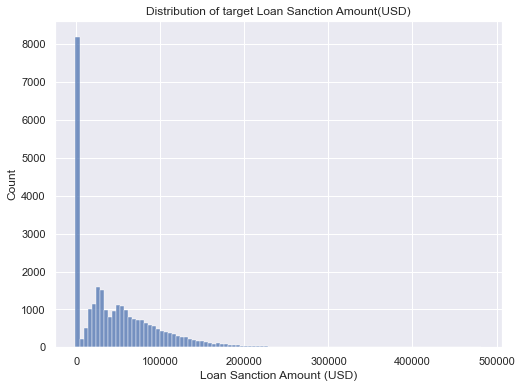

In [49]:
plt.figure(figsize=(8, 6))

target = train['Loan Sanction Amount (USD)']
sns.histplot(x=target)
plt.title('Distribution of target Loan Sanction Amount(USD)')
plt.show()

<p>A lot of the target values are Zero which indicates that they were not given any loan. We should see how our target distribution looks without zero</p>

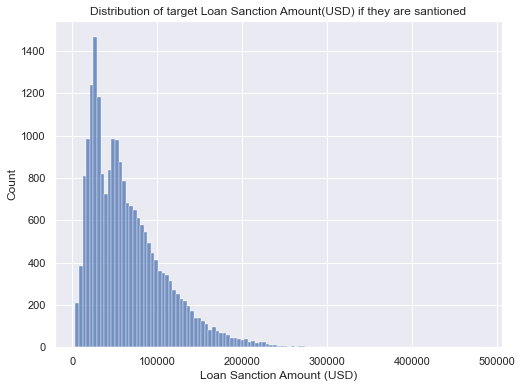

In [50]:
plt.figure(figsize=(8, 6))

sns.histplot(x=target[target>0])
plt.title('Distribution of target Loan Sanction Amount(USD) if they are santioned')
plt.show()

In [51]:
target[target>0].describe()

count    21457.00000
mean     65881.39777
std      44858.65008
min       4023.18000
25%      30310.86000
50%      55191.66000
75%      89126.82000
max     481907.32000
Name: Loan Sanction Amount (USD), dtype: float64

In [52]:
print(f"The target has a skewness of {target.skew()}")
print(f"The target has a peakedness of {target.kurtosis()}")

The target has a skewness of 1.2299390309619025
The target has a peakedness of 1.7601224307225243


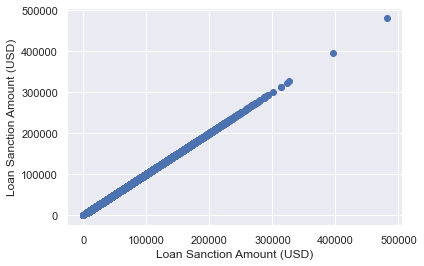

In [53]:
# looking for outlayers
plt.scatter(target, target)
plt.xlabel('Loan Sanction Amount (USD)')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

We can do power transformation to reduce the skewness using different transformation like log, box-cox or johnson transformation

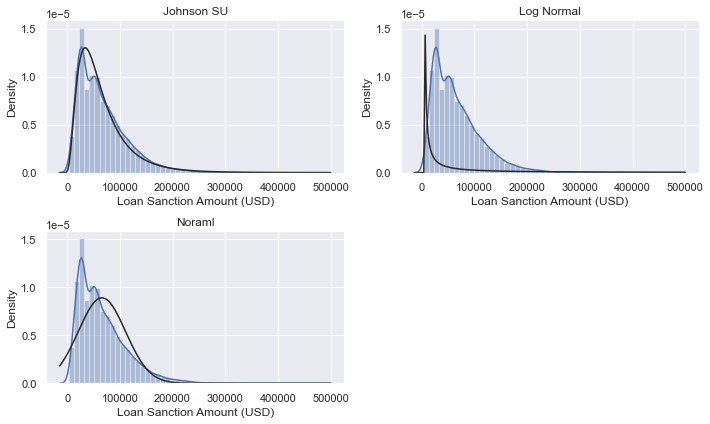

In [54]:
# remvoing 0 values to do transformation
target_without_zero = target[target > 0]

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1);
sns.distplot(target_without_zero, fit=stats.johnsonsu)
plt.title('Johnson SU')

plt.subplot(2, 2, 2)
sns.distplot(target_without_zero, fit=stats.lognorm)
plt.title("Log Normal")

plt.subplot(2, 2, 3)
sns.distplot(target_without_zero, fit=stats.norm)
plt.title("Noraml")

plt.tight_layout()

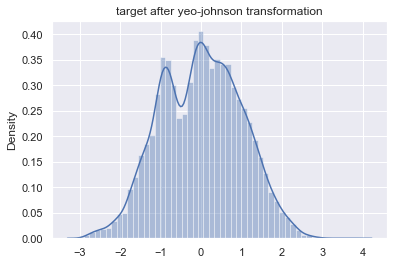

In [55]:
target_transformed = pd.Series(PowerTransformer().fit_transform(target_without_zero.to_frame()).flatten())

sns.distplot(x= target_transformed)
plt.title("target after yeo-johnson transformation")
plt.show()

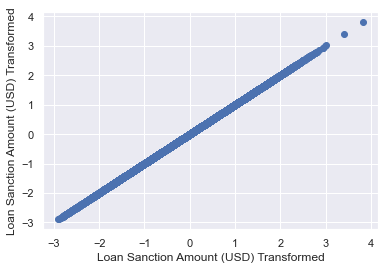

In [56]:
plt.scatter(target_transformed, target_transformed)
plt.xlabel('Loan Sanction Amount (USD) Transformed')
plt.ylabel('Loan Sanction Amount (USD) Transformed')
plt.show()

In [57]:
print(f"The target has a skewness of {target_transformed.skew()} after transformation")
print(f"The target has a peakedness of {target_transformed.kurtosis()} after transformation")

The target has a skewness of -0.022494135650949883 after transformation
The target has a peakedness of -0.4837323865801695 after transformation


****NOTES:****
<BR>
* Target has a lot of zero values indicating no loan sanction 
* The target show some skewness and peakedness and does not follow normal distribution
* There are 2 unusally high values in target features
    
****INSIGHTS:****
<BR>
* We can log transformation or Johnson Transformation on target to normalize it
* We can handle zero inflated target variable by creating two models where classification model will predict if the person will have loan sanctioned or not and regression model would predict loan amount if they were given loan sanction for which we will create a feature we will predict if someone was given sanction or not
    
Before doing anything else we will create a feature on loan santioned or not
  
<br>
    You can find more about hadling zero inflated target from the article <a href='https://towardsdatascience.com/zero-inflated-regression-c7dfc656d8af'>Zero-Inflated Regression</a> by <b>Dr. Robert Kübler</b>

In [58]:
train['Loan Sanctioned'] = train['Loan Sanction Amount (USD)'] > 0

Right now Loan Santioned feature  is also a target feature we will anayliz it too

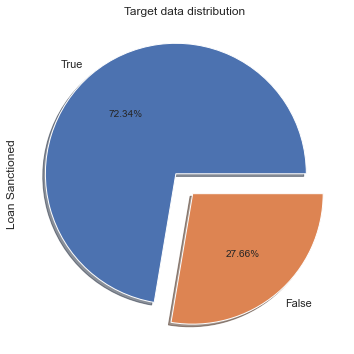

In [59]:
plt.figure(figsize=(8, 6))

train['Loan Sanctioned'].value_counts().plot(kind='pie', explode=[0.1, 0.1], 
                                            autopct='%2.2f%%', shadow=True)

plt.title('Target data distribution')
plt.show()

****NOTES:****
<BR>
* Loan Santioned target feature is not normally distributed

****INSIGHTS****
<br>    
* May need to use sampling method to increase accuracy
    
We are done with analyzing target variables now we will analyze continous data and see their relationship with both of the target variables

<H4>ANALYZING CONTINOUS DATA</H4>

- see basic overview
- plot distribution
- look for outliers
- what kind of relation with target can we infer from the scatterplot

In [60]:
con_feats = train.select_dtypes(include=['float', 'int']).columns

print("The Train sets overview: ")
display(train[con_feats].describe())
print("The Test set overview: ")
display(test[list(set(con_feats) - {"Loan Sanction Amount (USD)"})].describe())

The Train sets overview: 


,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,29660.00000,25167.00000,29660.00000,29493.00000,27214.00000,27990.00000,29660.00000,29660.00000,24900.00000,29660.00000,29660.00000,29660.00000
mean,40.09922,2630.99056,88792.05727,400.89375,2.25340,739.85347,0.19407,501.88183,2631.31728,-4.70779,131733.51717,47649.34221
std,16.05002,11319.01801,59480.99525,242.26540,0.95199,72.15213,0.39549,288.16074,11378.31432,74.36935,93421.28827,48221.14669
min,18.00000,377.70000,6048.24000,-999.00000,1.00000,580.00000,0.00000,1.00000,377.70000,-999.00000,-999.00000,-999.00000
25%,25.00000,1650.25000,41200.11250,247.78000,2.00000,681.73250,0.00000,251.00000,1649.81000,1.00000,60658.74000,0.00000
50%,40.00000,2223.30000,75114.08500,375.09000,2.00000,739.81500,0.00000,504.00000,2223.96500,1.00000,109993.61000,35209.39500
75%,55.00000,3090.33000,119890.85750,521.05000,3.00000,799.04000,0.00000,751.00000,3090.83250,1.00000,178801.90500,74261.25000
max,65.00000,1777460.21000,621497.82000,3840.88000,14.00000,896.26000,1.00000,999.00000,1777460.21000,1.00000,1077966.73000,481907.32000


The Test set overview: 


,Age,Dependents,Loan Amount Request (USD),Property ID,Property Age,Property Price,Current Loan Expenses (USD),Credit Score,Co-Applicant,Income (USD),No. of Defaults
count,20000.00000,18858.00000,20000.00000,20000.00000,19108.00000,19832.00000,19917.00000,19257.00000,19923.00000,19250.00000,20000.00000
mean,39.94050,2.25125,88859.07671,501.02450,2534.10200,133466.49715,408.46236,738.82154,0.85349,2536.99539,0.18950
std,16.09762,0.95315,60007.33367,287.53772,1408.50926,93334.86197,215.84653,72.40650,0.35363,1415.90880,0.39192
min,18.00000,1.00000,6185.48000,1.00000,368.59000,7353.49000,41.37000,580.04000,0.00000,368.59000,0.00000
25%,25.00000,2.00000,40889.03000,252.00000,1658.39750,61757.61500,250.89000,680.30000,1.00000,1659.72250,0.00000
50%,40.00000,2.00000,74565.99000,501.00000,2220.60500,110871.82500,374.00000,739.30000,1.00000,2224.59000,0.00000
75%,55.00000,3.00000,120068.85250,748.00000,3082.25000,179970.68750,519.57000,797.44000,1.00000,3082.92500,0.00000
max,65.00000,13.00000,576335.68000,999.00000,30427.68000,816375.09000,3305.97000,893.83000,1.00000,30427.68000,1.00000


Most of the features look good with median and mean close and min values which are not low but but some features are showing negative as their minimum value. Lets look into them deeper by plotting them
Everything looks ok in train set

In [61]:
outlayer_feats = ['Property Price', 'Co-Applicant', 'Current Loan Expenses (USD)', 'Loan Sanction Amount (USD)']

In [62]:
(train[outlayer_feats] == -999).sum()

Property Price                 341
Co-Applicant                   165
Current Loan Expenses (USD)    174
Loan Sanction Amount (USD)     338
dtype: int64

<p>It seems there are 1000 rows which has outlayers with values of -999. There are multiple ways we can handle this problem. For Loan Santion Amount since it is our target data we will remove the rows with which -999 in in the target feature. For other featrues we will just replace them with null</p>

In [63]:
train = train[train['Loan Sanction Amount (USD)'] != -999]

In [64]:
var = ['Property Price', 'Co-Applicant', 'Current Loan Expenses (USD)']

train[var] = train[var].replace({-999: np.nan})
test[var] = test[var].replace({-999: np.nan})

In [65]:
(train[outlayer_feats] == -999).sum()

Property Price                 0
Co-Applicant                   0
Current Loan Expenses (USD)    0
Loan Sanction Amount (USD)     0
dtype: int64

****For regression part****


#analyzing continous variables

In [66]:
 # dataset with only loan Santioned amount greater zero to help analyzing
train_greater_than_zero = train[train['Loan Sanction Amount (USD)'] > 0]

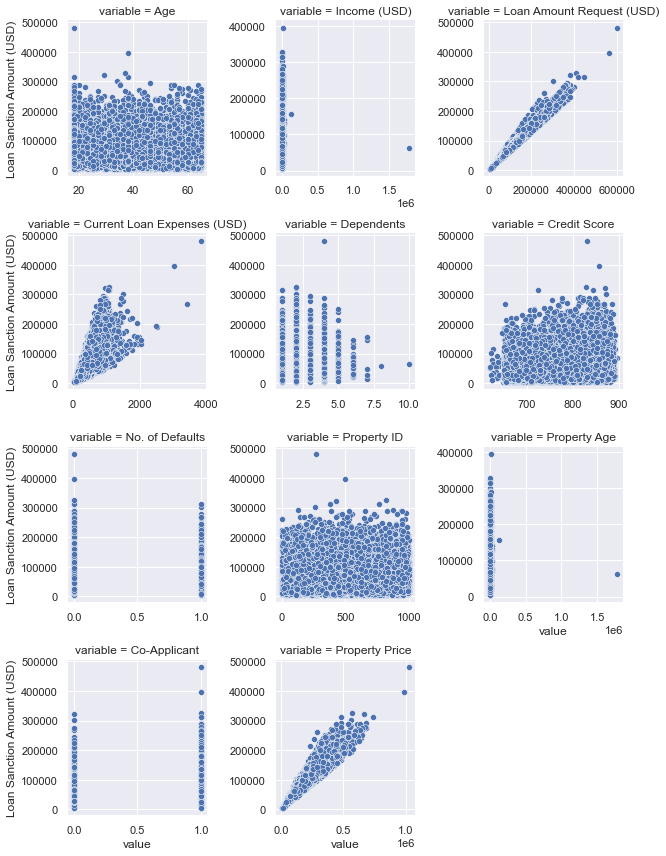

In [67]:
f = train_greater_than_zero.melt(value_vars=con_feats, id_vars=['Loan Sanction Amount (USD)'])
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=3)
g.map(sns.scatterplot, 'value', 'Loan Sanction Amount (USD)')
plt.show()

We can easily spot some outlayers in some features like Property Age, Current Loan Expenses, Income, Dependents. We will remove them right row but before that we will need to fill in the null values with something so that we can filter unusal values as comparing something will null values will give us false. 

In [68]:
train = train.fillna(-1)
train = train[(train['Dependents'] < 10) &  (train['Income (USD)'] < 100000) & (train['Property Age'] < 100000) & (train['Current Loan Expenses (USD)'] < 3000)]
train.replace({-1: np.nan}, inplace=True)

In [69]:
train_greater_than_zero = train[train['Loan Sanction Amount (USD)'] > 0]

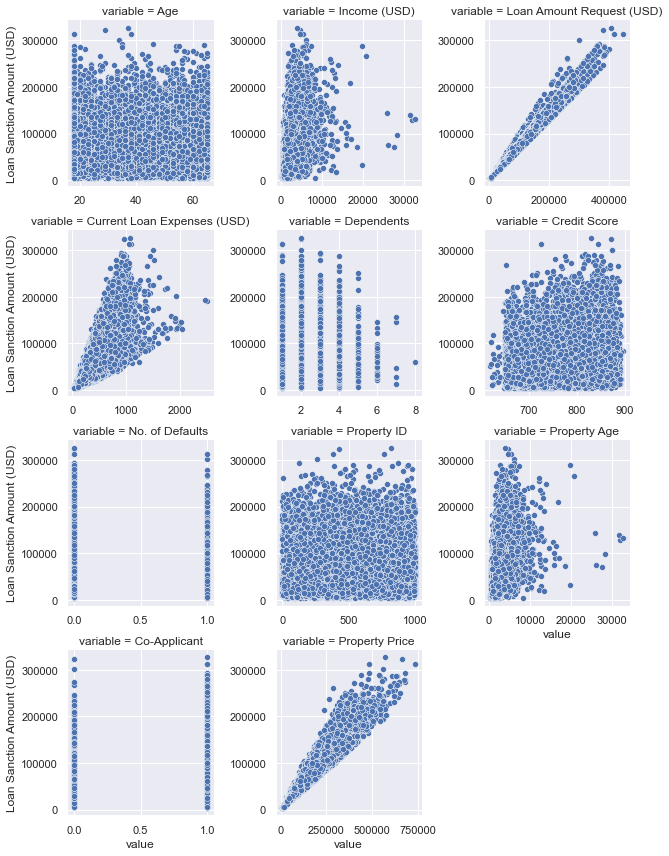

In [70]:
# after cleaning
f = train_greater_than_zero.melt(value_vars=con_feats, id_vars=['Loan Sanction Amount (USD)'])
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=3)
g.map(sns.scatterplot, 'value', 'Loan Sanction Amount (USD)')
plt.show()

Property Age and Income show the same plot so we will investiage that first

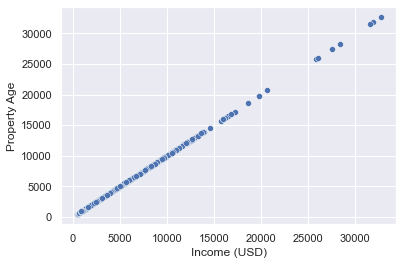

In [71]:
x = train_greater_than_zero['Income (USD)']
y = train_greater_than_zero['Property Age']
sns.scatterplot(x=x, y=y)
plt.show()

For some reason Property Age and Income column has the same featrue and it is also the case in test dataset which is making me question the validity of the datasets. But since The datset came from a Machine learning competition and came from we will just assume that is was a mistake or place intentionally by the organizers. So we will remove Property Age(to remove co-linearity) and go on with the project and see how it ends up 

In [72]:
train.drop(columns=['Property Age'], inplace=True)
train_greater_than_zero = train[train['Loan Sanction Amount (USD)'] > 0]

In [73]:
con_feats = list(set(con_feats) - {"Property Age"})

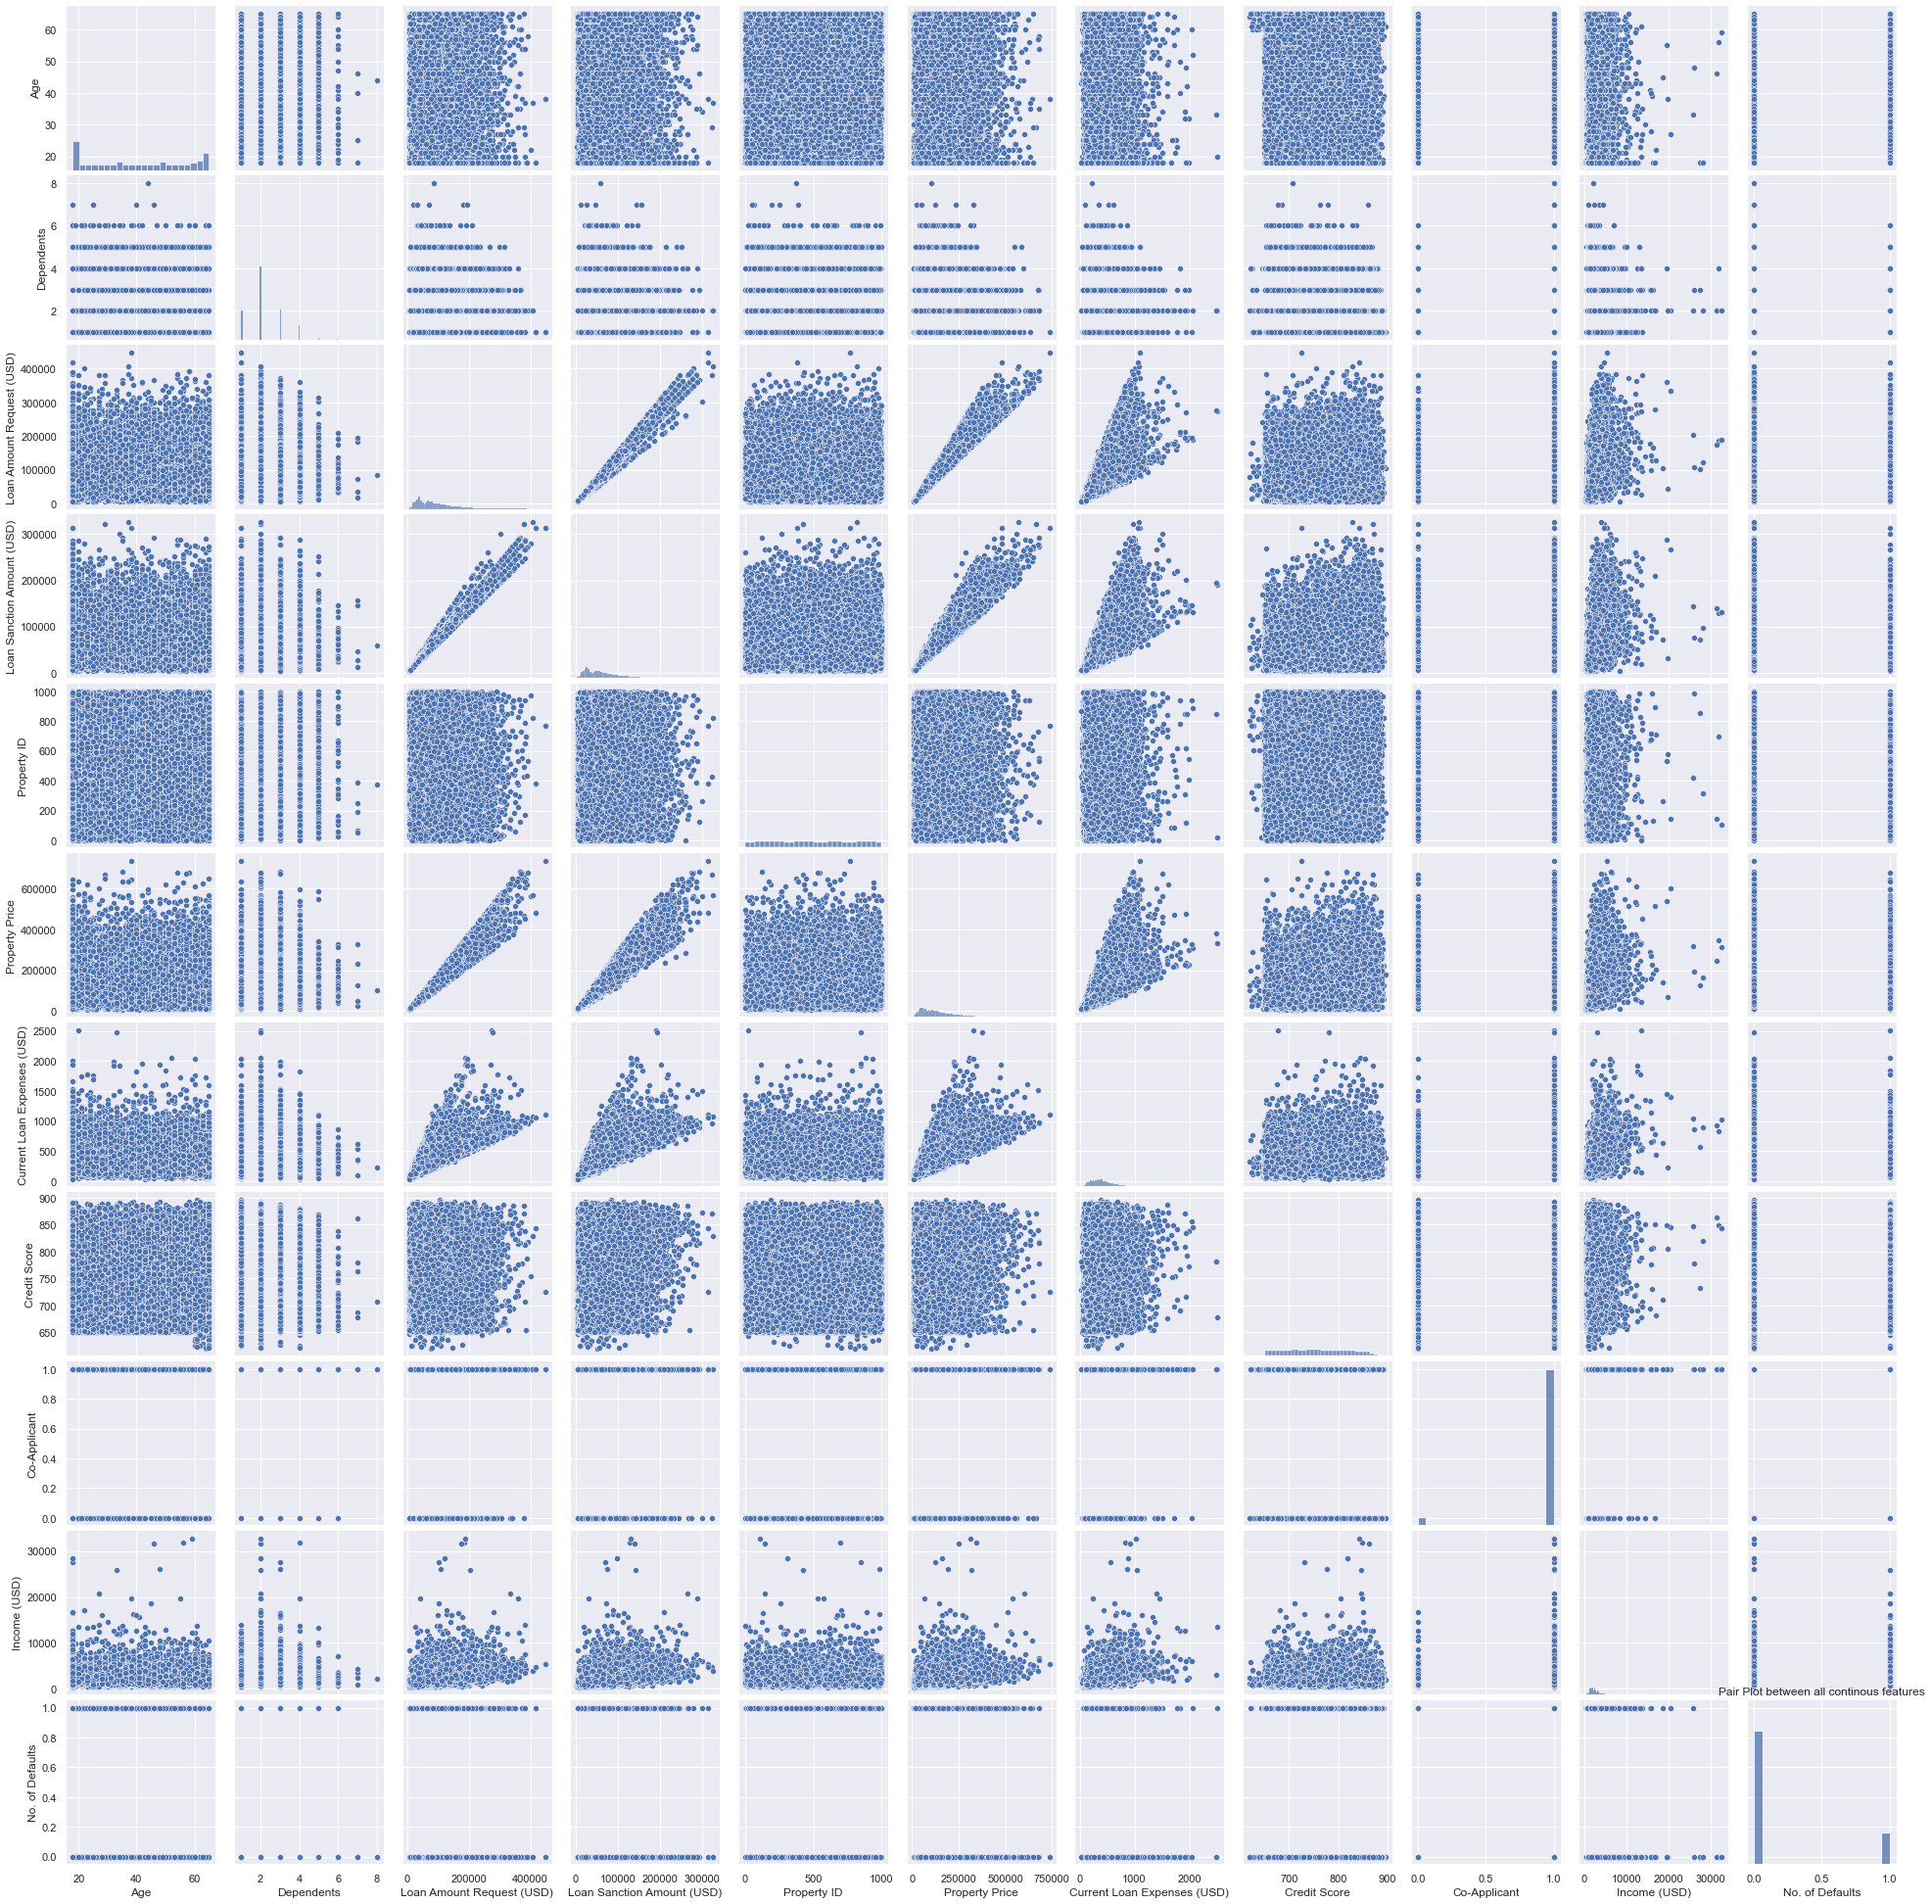

In [74]:
# overview for all continous features
sns.pairplot(train_greater_than_zero[con_feats])
plt.title("Pair Plot between all continous features")
plt.show()

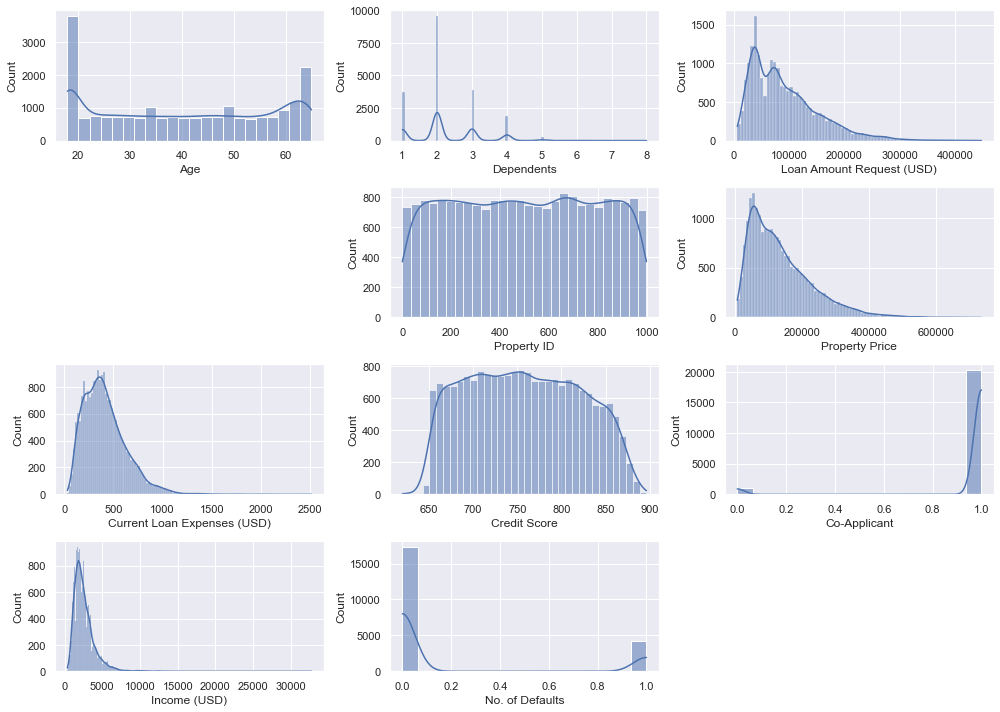

In [75]:
plt.figure(figsize=(14, 10))
for index, col in enumerate(con_feats):
    if col == 'Loan Sanction Amount (USD)':
        continue
    
    plt.subplot(4, 3, index+1)
    sns.histplot(train_greater_than_zero[col], kde=True)

    
plt.tight_layout()

****INSIGHTS:****
<br>
* There are some outlayers present in Property Age, Current Loan Expenses, Income, Dependents
* There is a some repeated values in Property Price which is hightly unusual
* Most continous values does not have a normal distribution
* Age surprising does not show any relation with target

****NOTES:****
<br>
* <strike>Removing outlayers</strike>
* Applying log or other transformation for normal distriubtion
* Try feature engineering on feature likes Age which surprisingly does not show any relationship
* Try different feature engineering techniques on different features

#analyzing categorical features

In [247]:
# removing Customer ID, Name, Loan Santioned for high cardianility
cat_feats = list(set(train.columns) - set(con_feats) - {'Customer ID', 'Name', 'Loan Sanctioned'})
train_greater_than_zero[cat_feats].head()

,Profession,Expense Type 1,Property Location,Gender,Location,Property Type,Income Stability,Type of Employment,Expense Type 2,Has Active Credit Card
0,Working,N,Rural,F,Semi-Urban,4,Low,Sales staff,N,NaN
1,Working,N,Rural,M,Semi-Urban,2,Low,NaN,Y,Unpossessed
2,Pensioner,N,Urban,F,Semi-Urban,2,High,NaN,Y,Unpossessed
3,Pensioner,N,Semi-Urban,F,Rural,2,High,NaN,Y,Unpossessed
4,Working,N,Semi-Urban,F,Semi-Urban,4,Low,High skill tech staff,Y,Active


In [248]:
len(cat_feats)

10

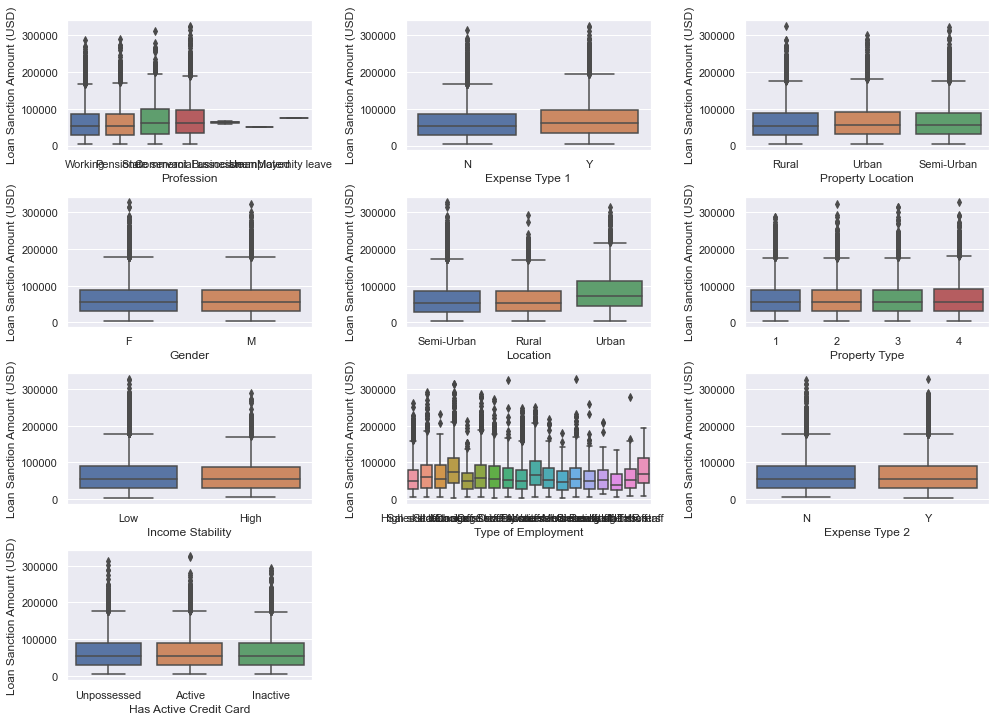

In [249]:
plt.figure(figsize=(14, 10))
for index, col in enumerate(cat_feats):
    plt.subplot(4, 3, index+1)
    sns.boxplot(x=col, y='Loan Sanction Amount (USD)', data=train_greater_than_zero)
    
plt.tight_layout()

The Profession feature looks weird lets check that out

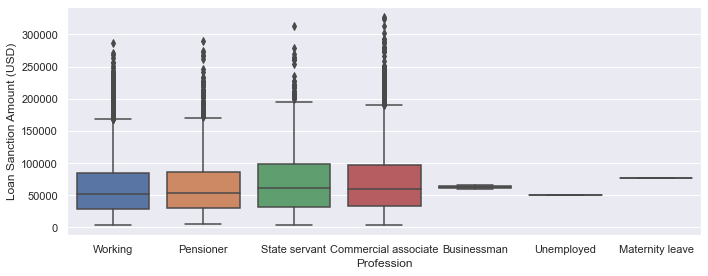

In [250]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Profession', y='Loan Sanction Amount (USD)', data=train_greater_than_zero)
plt.tight_layout()

In [254]:
train_greater_than_zero['Profession'].value_counts()

Working                 11627
Commercial associate     5759
Pensioner                2323
State servant            1738
Businessman                 2
Unemployed                  1
Maternity leave             1
Name: Profession, dtype: int64

Some categories has very few observation we need to do something about them

By creating a distribution plot of Loan Sanctioned with respect to each feature we see easily which feature has more impact on target

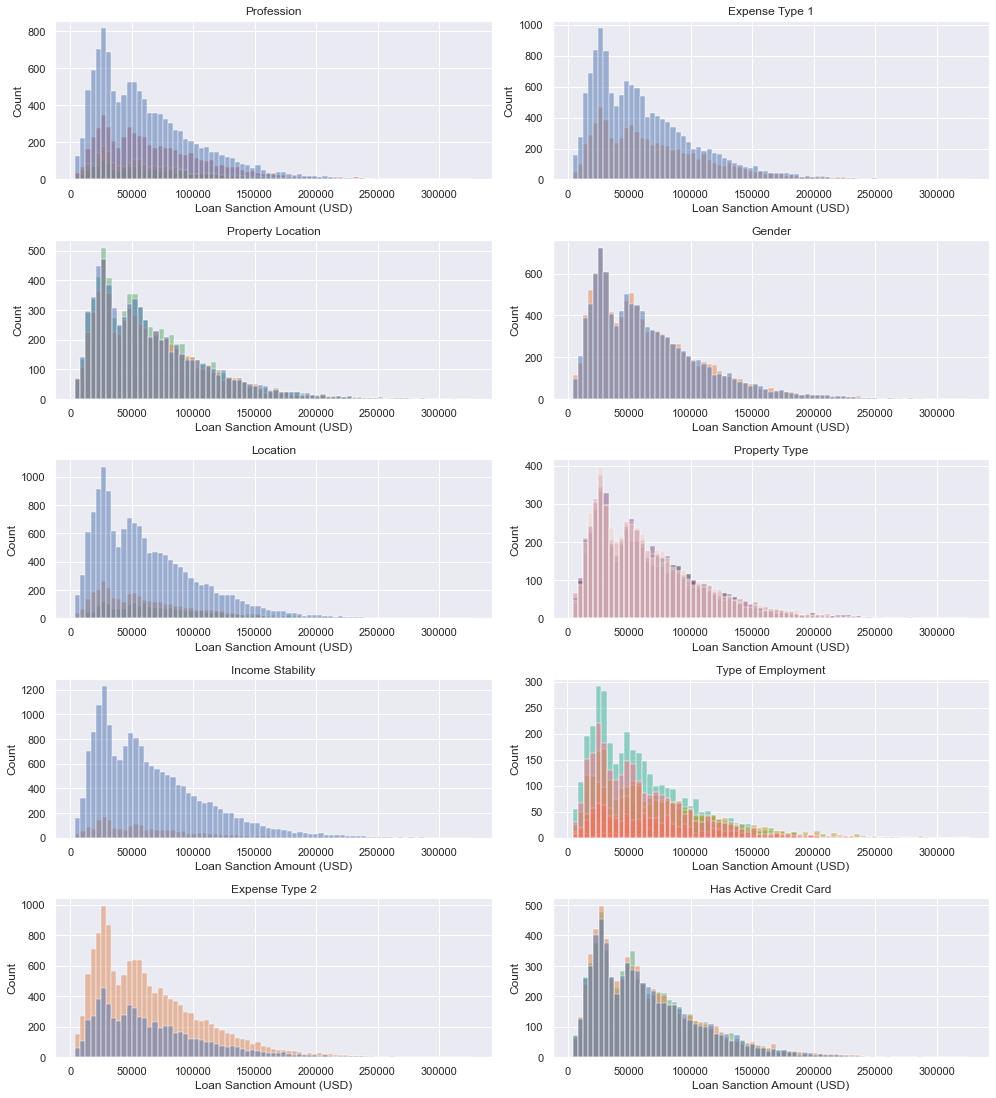

In [252]:
plt.figure(figsize=(14, 18))
legend = True
for index, col in enumerate(cat_feats):
    plt.subplot(6, 2, index+1)
    if train_greater_than_zero[col].nunique() > 5:
        legend = False
    sns.histplot(x='Loan Sanction Amount (USD)', hue=col, data=train_greater_than_zero, legend=legend)
    plt.title(col)
    
plt.tight_layout()

We will also use ANOVA to see possible useful features.<br>
To learn more about feature selection with anova you can check this article <a href='https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476'>ANOVA for Feature Selection in Machine Learning</a> by <b>Sampath Kumar Gajawada</b>

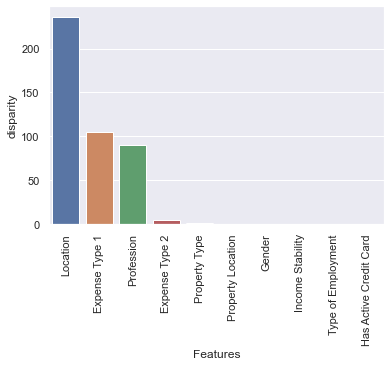

In [253]:
def anova(frame):
    anv = pd.DataFrame()
    anv['Features'] = cat_feats
    pvals = []
    for feats in anv['Features']:
        samples = []
        for category in frame[feats].unique():
            s = frame[frame[feats] == category]['Loan Sanction Amount (USD)'].values
            samples.append(s)
            
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    
    anv['Pvals'] = pvals
    
    return anv.sort_values(by='Pvals')

a = anova(train_greater_than_zero)
a['disparity'] = np.log(1./a['Pvals'].values)
sns.barplot(data=a, x='Features', y='disparity')
plt.xticks(rotation=90)
plt.show()

****NOTES:****
<BR>
* Name, CustomerId are useless as they do not contain any useful information
* Loan Sanctioned is also useless as there are only one category
* Most of the other categorical features are also useless as they do not explain much variability in target feature other than Location, Expense Type, Profession, Type of Employment(was not able capture throught anova but was able identify from the box plots), Stabilty(discovered in distribution) 
* Profession Feature has few categories which has very few observation less than 5.
* Property Type is represented ordinal variables but actually represents types without order between them so we convert is nominal variables
    
****INSIGHTS:****
<BR>
* Drop Name, CustomerId and Loan Santioned when doing regression
* Keep all other features even if they may appear useless
* <strike>Filter out the other categories which has less than 5 observation from Profession Feature or group them into one category Other</strike>
* <strike>Convert Property type from ordinal to nominal variables</strike>
* <strike>Add two Expenses feature and make them one feature since they are related</strike>

****For Classification****<br>
For classification we will analyze with a sample of the training set with equal amount True and False values so that we can easily compare between the two

In [48]:
train_clf = train.drop(columns=['Loan Sanction Amount (USD)'])

In [49]:
train_clf['Loan Sanctioned'].value_counts()

True     21454
False     7864
Name: Loan Sanctioned, dtype: int64

In [50]:
train_true_sample = train_clf[train_clf['Loan Sanctioned'] == True].sample(7864)
train_false_sample = train_clf[train_clf['Loan Sanctioned'] == False]

train_clf_sample = pd.concat([train_true_sample, train_false_sample])
train_clf_sample['Loan Sanctioned'].value_counts()

True     7864
False    7864
Name: Loan Sanctioned, dtype: int64

#analyzing categorical features

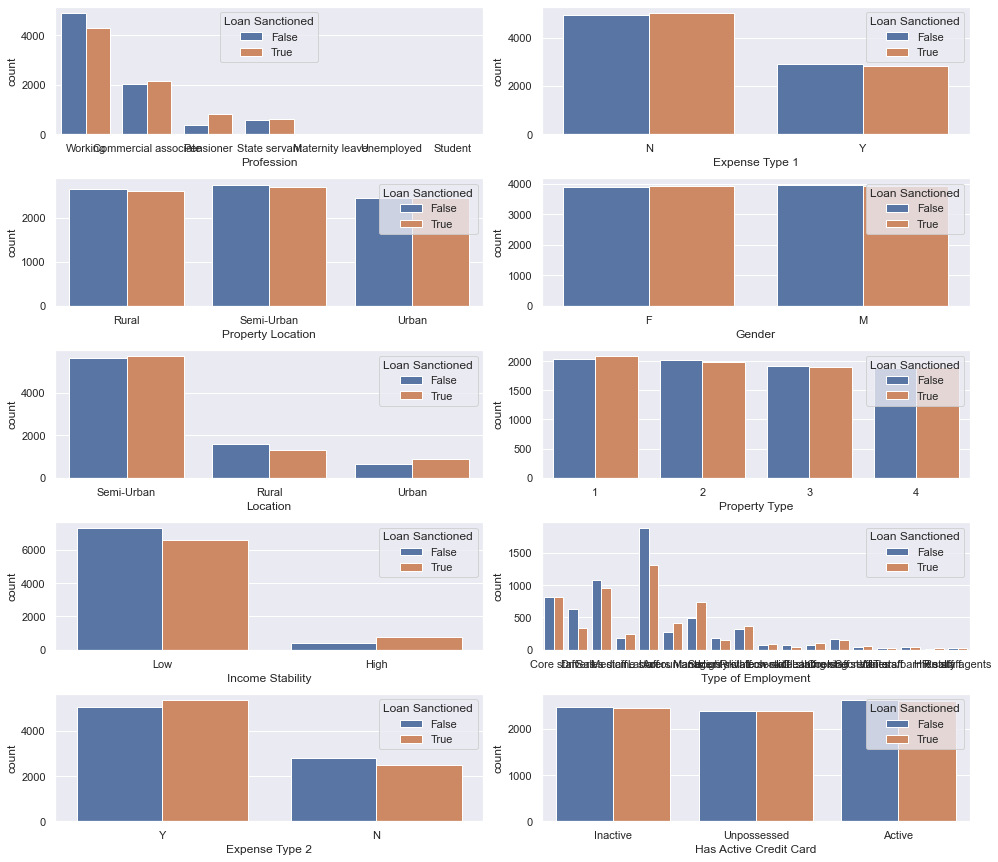

In [51]:
plt.figure(figsize=(14, 14))
lenged = True
for index, col in enumerate(cat_feats):
    if col == 'Loan Santioned':
        continue
    plt.subplot(6, 2, index+1)
    sns.countplot(x=col, hue='Loan Sanctioned', data=train_clf_sample)


    
plt.tight_layout()

****INSIGHTS:****
<Br>
* Location, Expense, Profession, Type of Employment, Income Stability has an impact on Getting Loan which makes.
* Income Stability although a important parameter has very unbalanced data
* Gender, Property Location does not have impact on target

****NOTES****
* Use the important featrues first then try adding the other unnessary data


#analyzing continous features

In [52]:
con_feats = list(set(con_feats) - {"Loan Sanction Amount (USD)"})

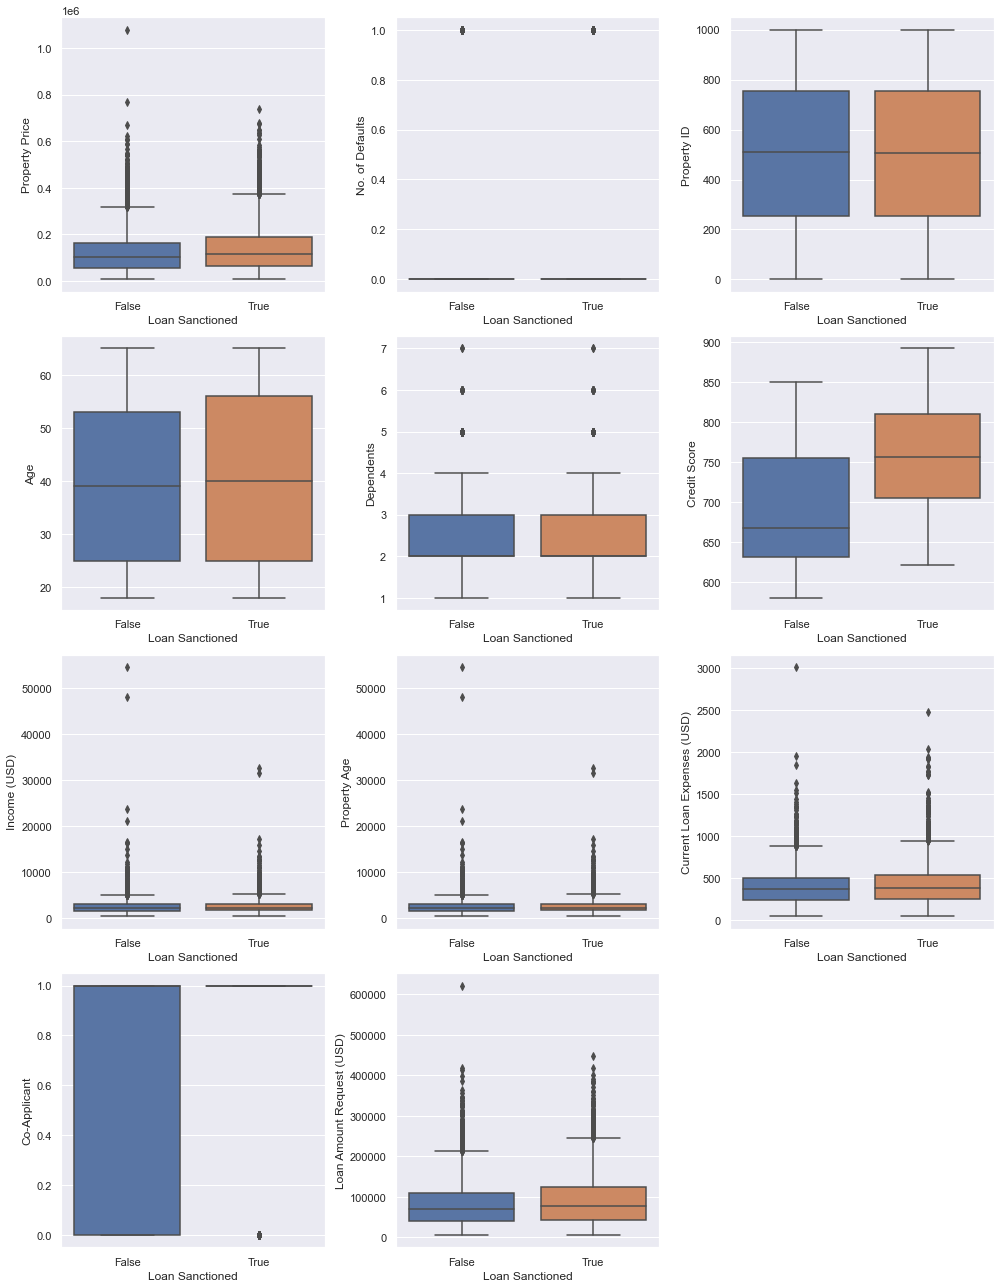

In [53]:
plt.figure(figsize=(14, 18))
for index, col in enumerate(con_feats):
    plt.subplot(4, 3, index+1)
    sns.boxplot(y=col, x='Loan Sanctioned', data=train_clf_sample)

plt.tight_layout()

At a glance we can see at a glance that Credit Score is very important while other has minor impact on the result. There also some features with unbalanced data like Co-Applicant, No. of Defaults

In [54]:
train_clf_sample['Co-Applicant'].value_counts()

1.00000    12053
0.00000     3601
Name: Co-Applicant, dtype: int64

In [276]:
train_clf_sample.groupby(['Loan Sanctioned', 'Co-Applicant']).size()

Loan Sanctioned  Co-Applicant
False            0.00000         3206
                 1.00000         4631
True             0.00000          395
                 1.00000         7422
dtype: int64

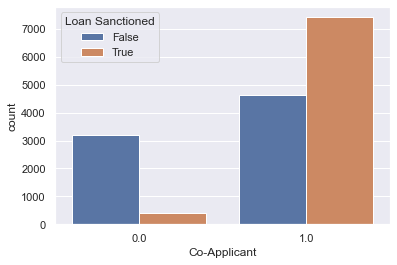

In [281]:
sns.countplot(x='Co-Applicant', hue='Loan Sanctioned', data=train_clf_sample)
plt.show()

It seems Co-Applicant is a very useful feature

In [55]:
train_clf_sample['No. of Defaults'].value_counts()

0    12691
1     3037
Name: No. of Defaults, dtype: int64

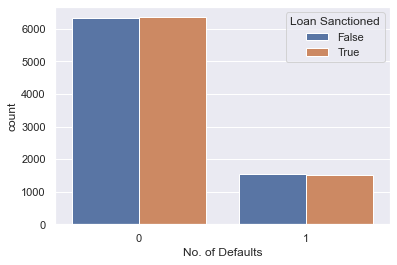

In [282]:
sns.countplot(x='No. of Defaults', hue='Loan Sanctioned', data=train_clf_sample)
plt.show()

No of Defaults does not seem to be very useful feature

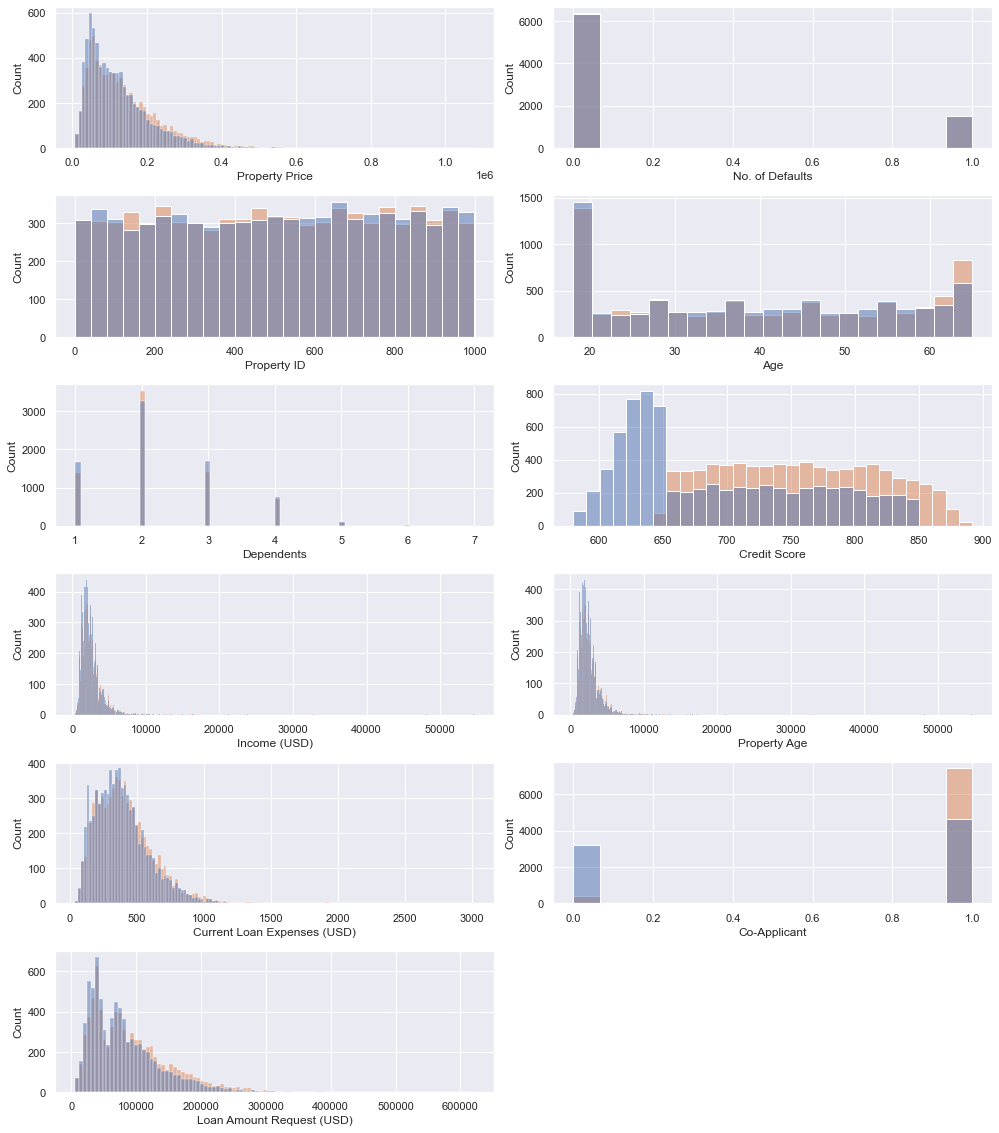

In [56]:
legend = False
plt.figure(figsize=(14, 18))
for index, col in enumerate(con_feats):
    if index == 1:
        legend = False
    plt.subplot(7, 2, index+1)
    sns.histplot(x=col, hue='Loan Sanctioned', data=train_clf_sample, legend=legend)

    
plt.tight_layout()

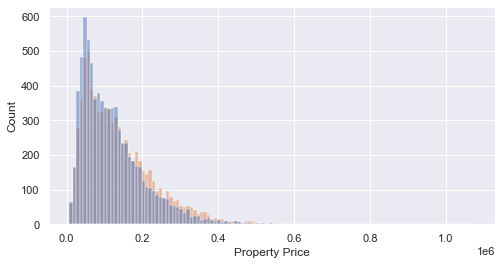

In [57]:
var = 'Property Price'
plt.figure(figsize=(8, 4))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, legend=legend)
plt.show()

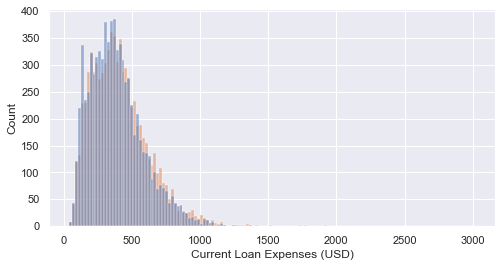

In [58]:
var = 'Current Loan Expenses (USD)'

plt.figure(figsize=(8, 4))
sns.histplot(x=var, hue='Loan Sanctioned', data=train_clf_sample, legend=legend)
plt.show()

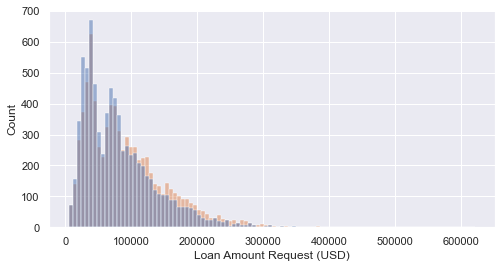

In [59]:
var = 'Loan Amount Request (USD)'
plt.figure(figsize=(8, 4))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, legend=legend)
plt.show()

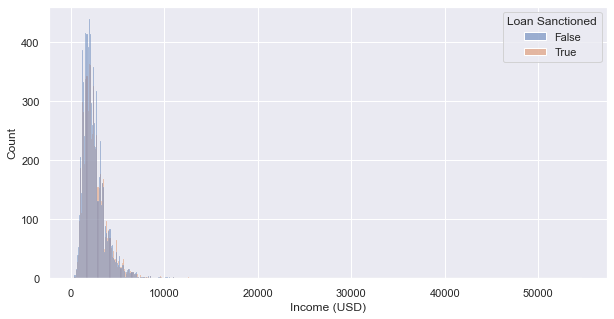

In [258]:
x = train_clf_sample['Income (USD)']
hue = train_clf_sample['Loan Sanctioned']
plt.figure(figsize=(10, 5))
sns.histplot(x=x, hue=hue)
plt.show()

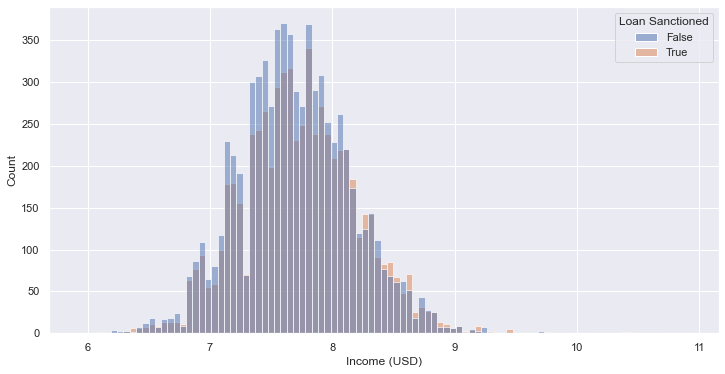

In [256]:
x = np.log(train_clf_sample['Income (USD)'])
hue = train_clf_sample['Loan Sanctioned']
plt.figure(figsize=(12, 6))
sns.histplot(x=x, hue=hue)
plt.show()

****NOTES:****
<br>
* More credits, Co-Applicants has greater chances of having Loan Sanctioned
* Loan Amount Requested, Current Loan Expenses, Property Price impacts the target value when they cross certain threshold
* Those who have co-applicants has more chances of getting loans

****INSIGHTS:****
<br>
* Create new feature from credits, Co-Applicants, Loan Amount Requested, Current Loan Expenses, Property Price by converting them to categorcial feature 
* Log transform Income (USD) and convert it to categorical feature

<h3>Feature Engineering</h3>

In [260]:
# converting Property Type from ordnial to nominal and one hot encoding
var = 'Property Type'

# converting from 1,2,3,4 to property_1, property_2, ...... and droppint last category
train_property_encoded=pd.get_dummies(train[var].astype('object'),prefix='Property_',drop_first=False)
test_property_encoded=pd.get_dummies(test[var].astype('object'),prefix='Property_',drop_first=False)

# dropping Property Type as we do not need it anymore
train.drop(columns=['Property Type'], inplace=True)
test.drop(columns=['Property Type'], inplace=True)

# joining one hot encoded values to 
train = train.join(train_property_encoded)
test = test.join(test_property_encoded)

In [261]:
test['Profession'].value_counts()

Working                 11405
Commercial associate     5247
Pensioner                1764
State servant            1577
Student                     4
Unemployed                  2
Maternity leave             1
Name: Profession, dtype: int64

In [262]:
train['Profession'].value_counts()

Working                 16539
Commercial associate     7775
Pensioner                2697
State servant            2297
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: Profession, dtype: int64

adding othere category for all categories less than. We will not add train and test together to avoid data leakage

In [263]:
var = 'Profession'
# grouping by Profession and counting each profession and if each category has less than 5 observation
# we will return them as other
train[var] = train.groupby(var)[var].transform(lambda x: x if x.count()> 5 else "Other")
test[var] = test.groupby(var)[var].transform(lambda x: x if x.count()> 5 else "Other")

normally we will fit transform the train and use only transform(based on the values of train set) on test set without doing any calculaton on test set but since the categories and their counts are pretty much the same  in train and test we will compute them seperately while coming to the same answer if we were to do it in the hard and more complicated way

<AxesSubplot:xlabel='Total Expenses', ylabel='Loan Sanction Amount (USD)'>

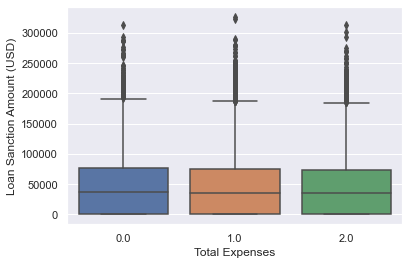

In [273]:
# adding expenses

expense1 = train['Expense Type 1'].factorize()[0]
expense2 = train['Expense Type 2'].factorize()[0]

total_expenses = pd.Series(expense1 + expense2)
train['Total Expenses'] = total_expenses

sns.boxplot(x='Total Expenses', y='Loan Sanction Amount (USD)', data=train)

In [296]:
train['Expense Type 1'].value_counts()

N    18776
Y    10538
Name: Expense Type 1, dtype: int64

In [305]:
 train_greater_than_zero['Expense Type 1'].value_counts()

N    13842
Y     7609
Name: Expense Type 1, dtype: int64

In [306]:
i = train_greater_than_zero[train_greater_than_zero['Expense Type 1'] == 'N'].sample(7609)
j = train_greater_than_zero[train_greater_than_zero['Expense Type 1'] == 'Y'].sample(7609)
print(i['Loan Sanction Amount (USD)'].mean())
j['Loan Sanction Amount (USD)'].mean()

62336.54647522671


71702.87983834933

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

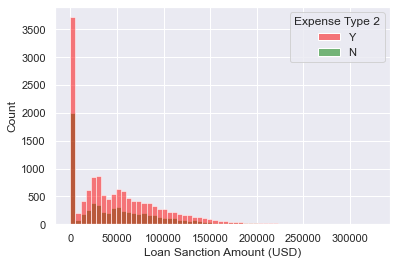

In [302]:
i = train[train['Expense Type 1'] == 'N'].sample(10538)
j = train[train['Expense Type 1'] == 'Y']

i = pd.concat([i, j])

sns.histplot(hue='Expense Type 2', x='Loan Sanction Amount (USD)', data=i, palette=['red', 'green'])

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

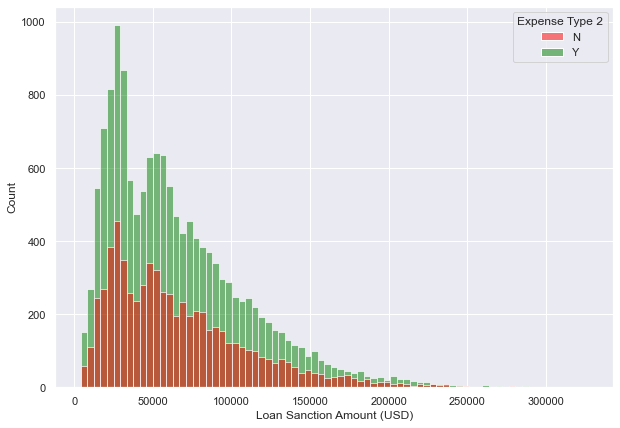

In [295]:
plt.figure(figsize=(10, 7))
sns.histplot(hue='Expense Type 2', x='Loan Sanction Amount (USD)', data=train_greater_than_zero, palette=['red', 'green'])

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

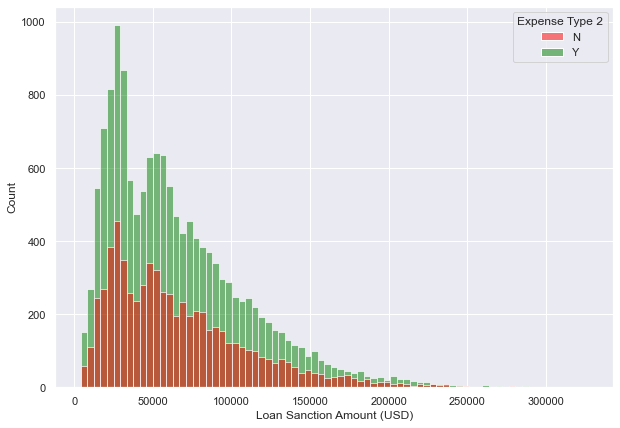

In [293]:
plt.figure(figsize=(10, 7))
sns.histplot(hue='Expense Type 2', x='Loan Sanction Amount (USD)', data=train_greater_than_zero, palette=['red', 'green'])

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

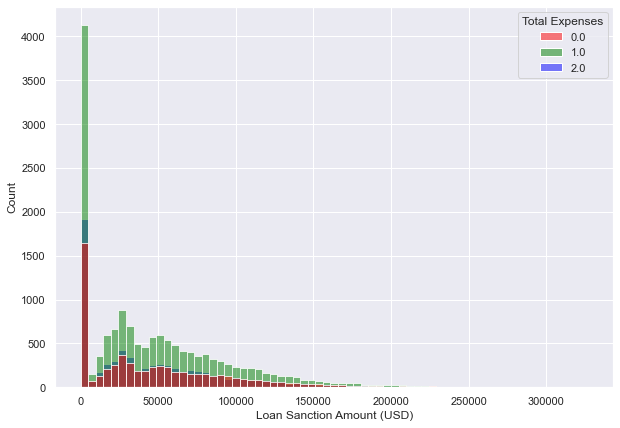

In [287]:
plt.figure(figsize=(10, 7))
sns.histplot(hue='Total Expenses', x='Loan Sanction Amount (USD)', data=train, palette=['red', 'green', 'blue'])

In [ ]:
stats.f_oneway()

In [76]:
train['Expense Type 1'].shape

(29314,)

In [111]:
expense1 = train[train['Expense Type 1'] == 'N']['Loan Sanction Amount (USD)']
expense2 = train[train['Expense Type 1'] == 'Y']['Loan Sanction Amount (USD)']

In [112]:
def get_variance(array):
    array_values = array.values
    mean = np.mean(array_values)

    
    var = (array_values - mean)**2
    return np.sum(var)

In [113]:
sst = get_variance(train['Loan Sanction Amount (USD)'])
exp1_var = get_variance(expense1)
exp2_var = get_variance(expense2)

In [114]:
ssb = exp1_var + exp2_var

In [115]:
exp1_mean = pd.Series(np.zeros(expense1.shape[0]))
exp2_mean = pd.Series(np.zeros(expense2.shape[0]))

exp1_mean.loc[:] = expense1.mean()
exp2_mean.loc[:] = expense2.mean()

In [116]:
grand_mean = train['Loan Sanction Amount (USD)'].mean()

ssw = np.sum((exp1_mean - grand_mean)**2 + (exp2_mean - grand_mean) ** 2)

In [117]:
ssw + ssb, exp_var

(67748971216070.93, 67782578712659.484)

In [122]:
dfw = (exp1_mean.shape[0] + exp2_mean.shape[0])-2
dfw

29312

In [123]:
dfb = 1

In [124]:
((ssb/dfb) / (ssw/dfw))

11035910.359386481

In [30]:
anova = pd.read_csv("./files/anova.csv")
anova.head()

,gurdian,numbers,numbers2
0,father,8,8
1,father,0,0
2,father,1,1
3,father,4,19
4,father,1,19


In [31]:
samples = []
for cls in anova['gurdian'].unique():
    s = anova[anova['gurdian'] == cls]['numbers2'].values
    samples.append(s)

In [32]:
stats.f_oneway(*samples)

F_onewayResult(statistic=3.867639235012462, pvalue=0.027296952952401556)

In [29]:
print(*samples)

[ 8  0  1  4  1  5  6 16  8  9  8  8  6  4  2  4  0  0] [25  1  6 11  7 21 18 37 35 20 19 19 26 11  4  7  5  1] [5 0 0 0 1 6 4 3 4 2 4 0 1 1 0 1 0 0]


In [34]:
i = stats.f_oneway(*samples)[1]

In [35]:
np.log(1/i)

3.600980196485614